<a href="https://colab.research.google.com/github/lindsay99m/Regression/blob/main/LMoller_Regression_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

 I will be using tornado data from NOAA's Sever Weather and Storm Prediction center
(https:/ /www.spc.noaa.gov/wcm/#data). I am interested in this data as it relates to my work on extreme event attribution and contains
data of injures, fatalities, and economic damage left by tornados recorded from 1950 to 2023. I will use this data to try and estimate
economic damage in dollar amounts and mortality rates to specific f-scale tornado rates/wind speeds in an attempt to predict future loss
and damages of torandoes. Being able to accurately estimate the total loss and damages of potential tornados based off of historical data will help local governments estimate potential loss and damages and help better allocate funds for future hazards.

**DISCLAIMER: Use High-RAM when running this notebook**

# Pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#load in dataset
url = 'https://raw.githubusercontent.com/lindsay99m/Regression/809c517e661f8bde1c888fdd20bf4a77bec5fa56/1950-2023_all_tornadoes.csv'

data = pd.read_csv(url)
data.describe()

,om,yr,mo,dy,tz,stf,stn,mag,inj,fat,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
count,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,...,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000
mean,123921.574162,1992.500140,5.945713,15.938752,3.000924,29.111586,22.557691,0.657862,1.575506,0.103014,...,3.649528,113.051248,1.026906,0.989566,0.998165,104.276660,9.022242,1.836480,0.578700,0.026107
std,235622.304082,19.876577,2.457315,8.770595,0.071003,15.017406,31.533645,1.481439,19.993546,1.604690,...,8.604926,216.507171,0.166080,0.101616,0.457422,96.148065,39.010755,17.305165,9.687358,0.159455
min,1.000000,1950.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,289.000000,1976.000000,4.000000,8.000000,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.160000,20.000000,1.000000,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000
50%,602.000000,1995.000000,6.000000,16.000000,3.000000,28.000000,11.000000,1.000000,0.000000,0.000000,...,0.900000,50.000000,1.000000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000,0.000000
75%,1212.000000,2009.000000,7.000000,24.000000,3.000000,42.000000,30.000000,1.000000,0.000000,0.000000,...,3.500000,100.000000,1.000000,1.000000,1.000000,135.000000,0.000000,0.000000,0.000000,0.000000
max,623401.000000,2023.000000,12.000000,31.000000,9.000000,78.000000,232.000000,5.000000,1740.000000,158.000000,...,234.700000,4576.000000,3.000000,1.000000,2.000000,810.000000,820.000000,710.000000,507.000000,1.000000


In [2]:
#show that the dataset fits the perameters
data.shape

(71398, 29)

In [3]:
#check column names and look for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71398 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      71398 non-null  int64  
 1   yr      71398 non-null  int64  
 2   mo      71398 non-null  int64  
 3   dy      71398 non-null  int64  
 4   date    71398 non-null  object 
 5   time    71398 non-null  object 
 6   tz      71398 non-null  int64  
 7   st      71398 non-null  object 
 8   stf     71398 non-null  int64  
 9   stn     71398 non-null  int64  
 10  mag     71398 non-null  int64  
 11  inj     71398 non-null  int64  
 12  fat     71398 non-null  int64  
 13  loss    71398 non-null  float64
 14  closs   71398 non-null  float64
 15  slat    71398 non-null  float64
 16  slon    71398 non-null  float64
 17  elat    71398 non-null  float64
 18  elon    71398 non-null  float64
 19  len     71398 non-null  float64
 20  wid     71398 non-null  int64  
 21  ns      71398 non-null  int64  
 22

In [4]:
#rename columns
data.rename(columns={'om' : 'count',
                     'stn' : 'f-scale',
                     'inj' : 'injuries',
                     'fat' : 'fatalities',
                     'closs' : 'crop_loss',
                     'slat' : 'start_lat',
                     'slong' : 'start_long',
                     'elat' : 'end_lat',
                     'elong' : 'end_long',
                     'len' : 'length_mi',
                     'wid' : 'width_yd',
                     'ns' :'state_count',
                     'sn' : 'track',
                     'seg' : 'tornado_segment'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71398 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        71398 non-null  int64  
 1   yr           71398 non-null  int64  
 2   mo           71398 non-null  int64  
 3   dy           71398 non-null  int64  
 4   date         71398 non-null  object 
 5   time         71398 non-null  object 
 6   tz           71398 non-null  int64  
 7   st           71398 non-null  object 
 8   stf          71398 non-null  int64  
 9   f-scale      71398 non-null  int64  
 10  mag          71398 non-null  int64  
 11  injuries     71398 non-null  int64  
 12  fatalities   71398 non-null  int64  
 13  loss         71398 non-null  float64
 14  crop_loss    71398 non-null  float64
 15  start_lat    71398 non-null  float64
 16  slon         71398 non-null  float64
 17  end_lat      71398 non-null  float64
 18  elon         71398 non-null  float64
 19  leng

In [5]:
# Delete rows where 'f-scale' is not in [0, 1, 2, 3, 4, 5] so only realy f-scale is recorded
valid_f_scales = [0, 1, 2, 3, 4, 5]
data = data[data['f-scale'].isin(valid_f_scales)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27760 entries, 2 to 71397
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        27760 non-null  int64  
 1   yr           27760 non-null  int64  
 2   mo           27760 non-null  int64  
 3   dy           27760 non-null  int64  
 4   date         27760 non-null  object 
 5   time         27760 non-null  object 
 6   tz           27760 non-null  int64  
 7   st           27760 non-null  object 
 8   stf          27760 non-null  int64  
 9   f-scale      27760 non-null  int64  
 10  mag          27760 non-null  int64  
 11  injuries     27760 non-null  int64  
 12  fatalities   27760 non-null  int64  
 13  loss         27760 non-null  float64
 14  crop_loss    27760 non-null  float64
 15  start_lat    27760 non-null  float64
 16  slon         27760 non-null  float64
 17  end_lat      27760 non-null  float64
 18  elon         27760 non-null  float64
 19  length_mi

# EDA

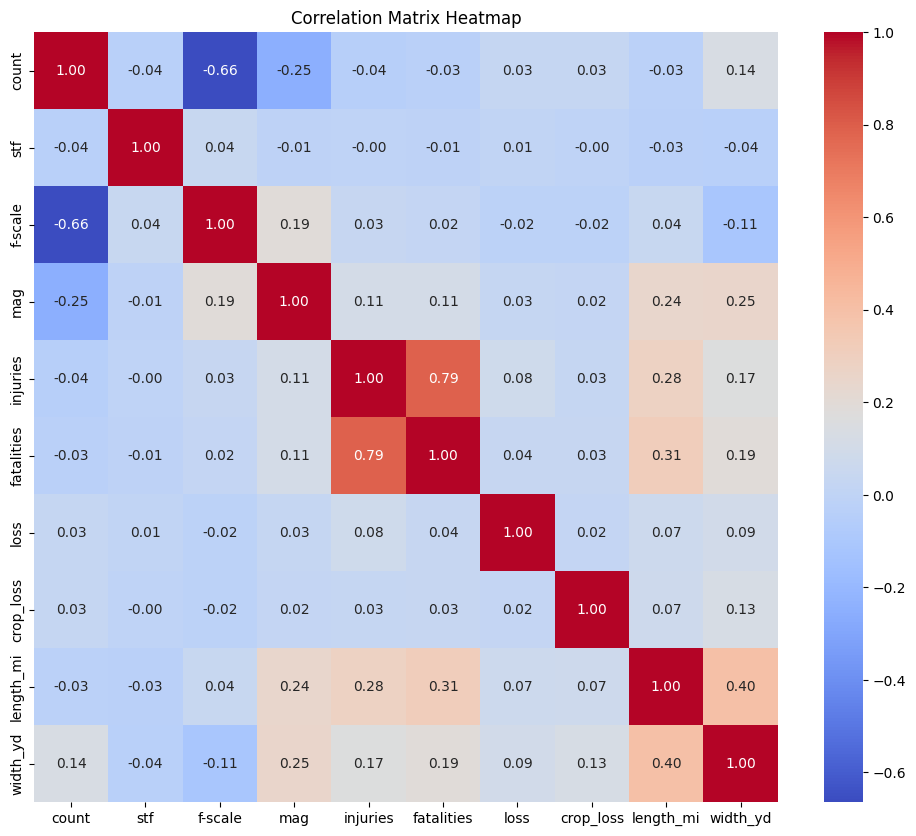

In [6]:
# Select numerical columns for correlation analysis
numerical_cols = ['count', 'stf', 'f-scale', 'mag', 'injuries', 'fatalities', 'loss', 'crop_loss', 'length_mi', 'width_yd']

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation heatmap matrix shows there is a strong correlation between injuries and fatalities and a correlation between width and length of the tornado path. There appears to be a slight correlation between tornado path length  and width and fatalities, injuries, and magnitude.

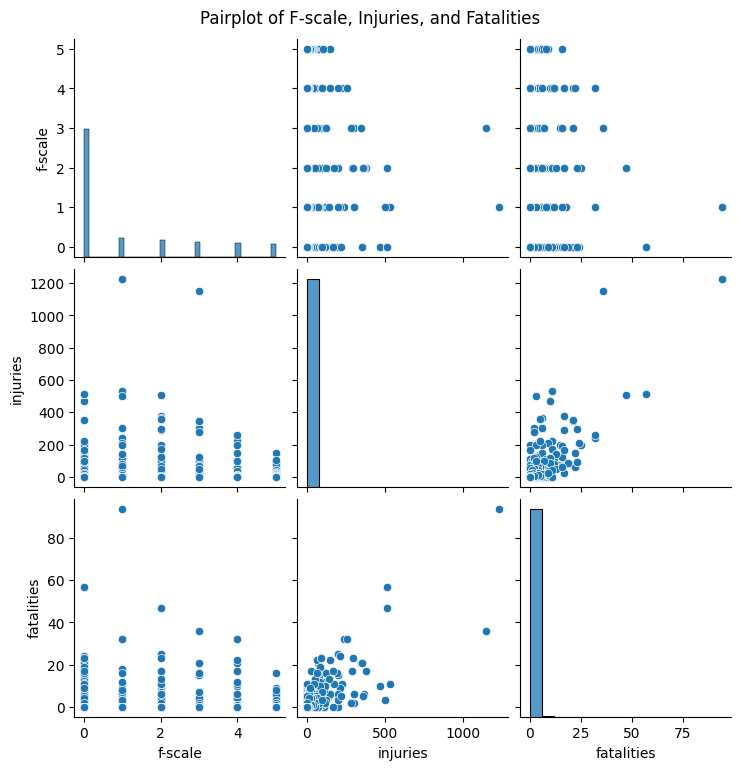

In [7]:
# Select columns for pairplot
cols_for_pairplot = ['f-scale', 'injuries', 'fatalities']
# Create the pairplot
sns.pairplot(data[cols_for_pairplot])
plt.suptitle('Pairplot of F-scale, Injuries, and Fatalities', y=1.02)
plt.show()


The pairplot shows that data clustering is most apparent between injuries and fatalities and less apparent with f-scale.

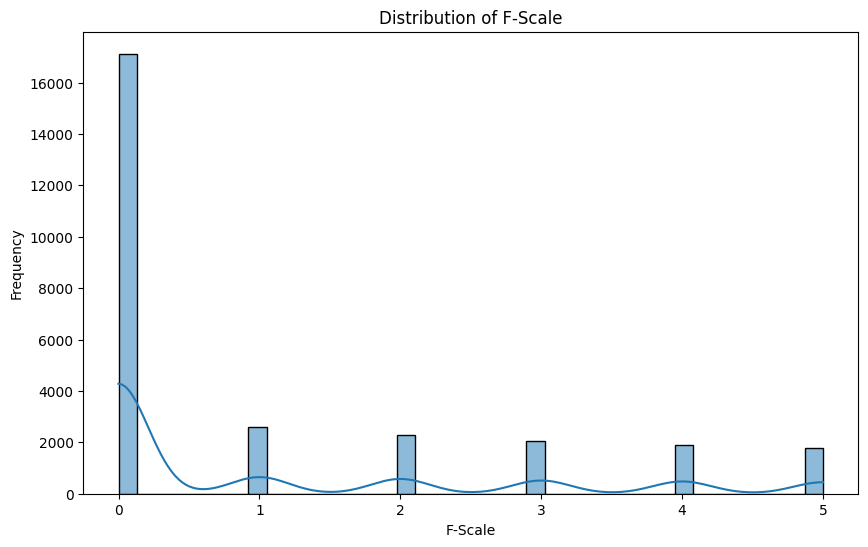

In [9]:
# Create the distribution plot for 'f-scale'
plt.figure(figsize=(10, 6))
sns.histplot(data['f-scale'], kde=True)  # Use histplot for distribution
plt.title('Distribution of F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Frequency')
plt.show()


The distribution plot shows that the recorded tornadoes are heavily skweded towards lower level 0 f-scale events while significantly less 1-5 f-scale events are recorded.

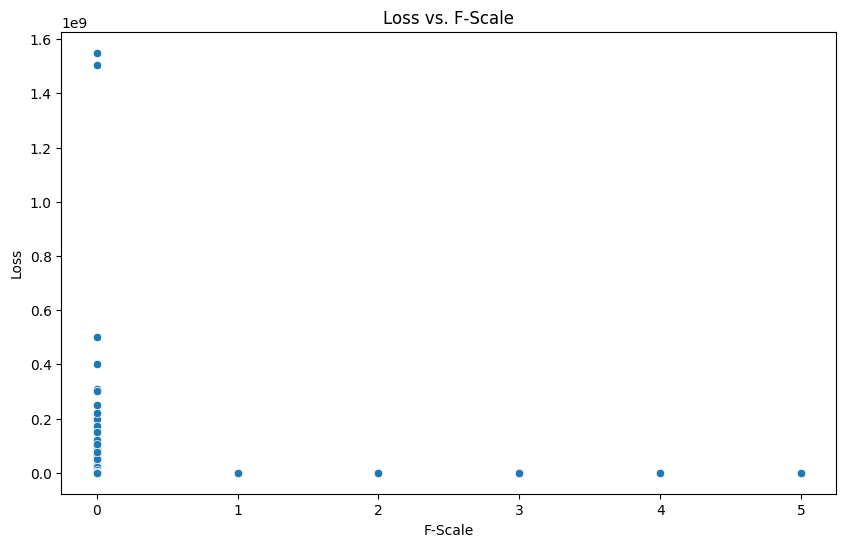

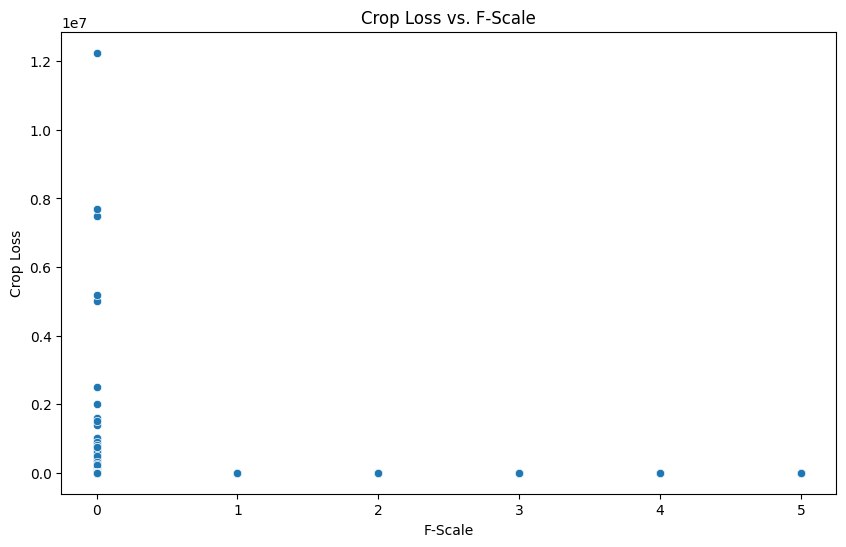

In [13]:
# Create the scatter plot of 'loss' vs 'f-scale'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='loss', data=data)
plt.title('Loss vs. F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Loss')
plt.show()

# Create the scatter plot of 'crop_loss' vs 'f-scale'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='crop_loss', data=data)
plt.title('Crop Loss vs. F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Crop Loss')
plt.show()


These two plots show that significantly more economic loss and crop loss has been caused by low grade tornadoes. This data is likely skewed due to the significantly higher number of 0 f-scale tornadoes.

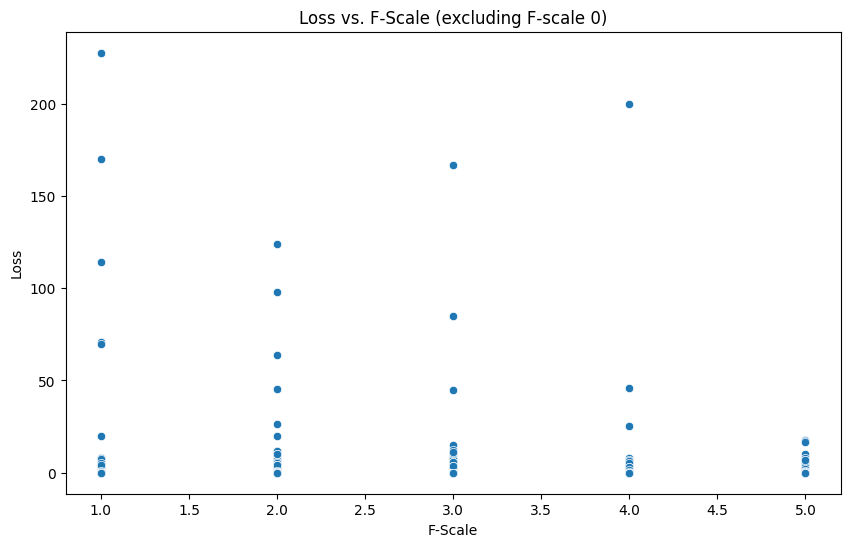

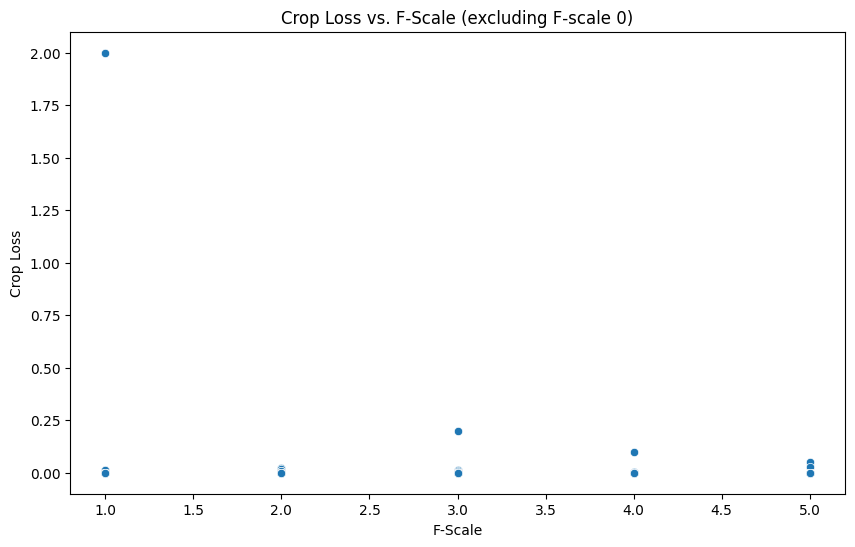

In [17]:
# Create the scatter plot of 'loss' vs 'f-scale', ignoring f-scale values of 0
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='loss', data=data[data['f-scale'] != 0])
plt.title('Loss vs. F-Scale (excluding F-scale 0)')
plt.xlabel('F-Scale')
plt.ylabel('Loss')
plt.show()

# Create the scatter plot of 'crop_loss' vs 'f-scale', ignoring f-scale values of 0
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='crop_loss', data=data[data['f-scale'] != 0])
plt.title('Crop Loss vs. F-Scale (excluding F-scale 0)')
plt.xlabel('F-Scale')
plt.ylabel('Crop Loss')
plt.show()


By removing the f-scale 0 events we are able to better see the distribution on loss and crop loss of stronger tornadoes. On average the lower scale toradoes have recorded higher economic damage.